In [29]:
import numpy as np
import pandas as pd
import sklearn

## Sélection des questions pertinentes

In [30]:
df_questions = pd.read_csv("../raw_data/deep_course_formulaire_question.csv")
df_questions

,aide,enonce_groupe,enonce_site,type,unite,id
0,NaN,Intervenez-vous (vos salariés) sur des matéria...,Intervenez-vous (vos salariés) sur des matéria...,1,NaN,006F52E9102A8D3BE2FE5614F42BA989
1,NaN,"De quelles sources (scellées, non scellées) ou...","De quelles sources (scellées, non scellées) ou...",0,NaN,01161AAA0B6D1345DD8FE4E481144D84
2,NaN,NaN,Le site est-il localisé sur une zone sismique ...,1,NaN,013D407166EC4FA56EB1E1F8CBE183B9
3,NaN,Etes-vous soumis ou avez-vous un plan de préve...,Etes-vous soumis ou avez-vous un plan de préve...,1,NaN,02522A2B2726FB0A03BB19F2D8D9524D
4,NaN,NaN,Plans et localisation des bâtiments communiqué...,0,NaN,0266E33D3F546CB5436A10798E657D97
...,...,...,...,...,...,...
311,NaN,Votre entreprise est-elle soumise à l'obligati...,Votre entreprise est-elle soumise à l'obligati...,1,NaN,FC221309746013AC554571FBD180E1C8
312,NaN,Quelle(s) autre(s) rubrique(s) ICPE 3000 conce...,Quelle(s) autre(s) rubrique(s) ICPE 3000 conce...,0,NaN,FC490CA45C00B1249BBE3554A4FDF6FB
313,NaN,De quelle convention collective relève votre e...,De quelle convention collective relève votre e...,0,NaN,FD86425BAD0511E7B3CE001851D17886
314,NaN,Quelles sont les technologies utilisées pour l...,Quelles sont les technologies utilisées pour l...,0,NaN,FE131D7F5A6B38B23CC967316C13DAE2


#### On ne garde que les questions fermées : type 1 (yes no question) et 2 (QCM avec choix cumulatifs) :

In [31]:
df_questions = df_questions.loc[df_questions["type"].isin([1,2])].drop(columns = ["enonce_groupe", "unite", "aide"])
df_questions

,enonce_site,type,id
0,Intervenez-vous (vos salariés) sur des matéria...,1,006F52E9102A8D3BE2FE5614F42BA989
2,Le site est-il localisé sur une zone sismique ...,1,013D407166EC4FA56EB1E1F8CBE183B9
3,Etes-vous soumis ou avez-vous un plan de préve...,1,02522A2B2726FB0A03BB19F2D8D9524D
5,Effectuez-vous des opérations de chargement / ...,1,02E74F10E0327AD868D138F2B4FDD6F0
9,Faites-vous de la mise sur le marché et/ou mis...,1,042F2AFDAD0611E7B3CE001851D17886
...,...,...,...
306,Etes-vous considéré comme un consommateur gazo...,1,F7664060CC52BC6F3D620BCEDC94A4B6
307,Avez-vous des intérimaires ? Du personnel temp...,1,F7E6C85504CE6E82442C770F7C8606F0
309,Avez-vous des chambres froides (Température < ...,2,FA7CDFAD1A5AAF8370EBEDA47A1FF1C3
310,Existe-t-il une station de traitement des eaux...,1,FBD7939D674997CDB4692D34DE8633C4


#### On élimine les questions qui étaient pour les groupes uniquement : 

In [32]:
df_questions = df_questions[df_questions['enonce_site'].notna()].reset_index(drop=True)
df_questions

,enonce_site,type,id
0,Intervenez-vous (vos salariés) sur des matéria...,1,006F52E9102A8D3BE2FE5614F42BA989
1,Le site est-il localisé sur une zone sismique ...,1,013D407166EC4FA56EB1E1F8CBE183B9
2,Etes-vous soumis ou avez-vous un plan de préve...,1,02522A2B2726FB0A03BB19F2D8D9524D
3,Effectuez-vous des opérations de chargement / ...,1,02E74F10E0327AD868D138F2B4FDD6F0
4,Faites-vous de la mise sur le marché et/ou mis...,1,042F2AFDAD0611E7B3CE001851D17886
...,...,...,...
251,Etes-vous considéré comme un consommateur gazo...,1,F7664060CC52BC6F3D620BCEDC94A4B6
252,Avez-vous des intérimaires ? Du personnel temp...,1,F7E6C85504CE6E82442C770F7C8606F0
253,Avez-vous des chambres froides (Température < ...,2,FA7CDFAD1A5AAF8370EBEDA47A1FF1C3
254,Existe-t-il une station de traitement des eaux...,1,FBD7939D674997CDB4692D34DE8633C4


## Etude des réponses

In [33]:
df_reponses = pd.read_csv("../raw_data/deep_course_formulaire_reponse.csv")
df_reponses

,node_id,valeur_actee,non_concerne_acte,commentaire_acte,question_id
0,2c90f5883f44af68013f564a1326558a,c3ae13b6-8907-389b-5daa-d4c19e4e9816,\0,NaN,006F52E9102A8D3BE2FE5614F42BA989
1,2c90f5883f44af68013f564a1326558a,scellées pour RX,\0,NaN,01161AAA0B6D1345DD8FE4E481144D84
2,2c90f5883f44af68013f564a1326558a,83dff396-6c91-01ca-46ed-ebcf7c685810,\0,Oui\n2,013D407166EC4FA56EB1E1F8CBE183B9
3,2c90f5883f44af68013f564a1326558a,3816c6a2-2a60-e9f2-1430-954151ba8d1a,\0,NaN,02522A2B2726FB0A03BB19F2D8D9524D
4,2c90f5883f44af68013f564a1326558a,fa4a1c04-c8b1-b7a5-fe48-4351eb44bcca,\0,nous recevons des matières dangereuses (gazole...,02E74F10E0327AD868D138F2B4FDD6F0
...,...,...,...,...,...
117075,ff8081817528e71501754135cdfb6d7b,NaN,\0,NaN,F033AB37C30201F73F142449D037028D
117076,ff8081817528e71501754135cdfb6d7b,NaN,\0,NaN,F457C545A9DED88F18ECEE47145A72C0
117077,ff8081817528e71501754135cdfb6d7b,NaN,\0,NaN,FBD7939D674997CDB4692D34DE8633C4
117078,ff8081817528e71501754135cdfb6d7b,NaN,\0,NaN,FD86425BAD0511E7B3CE001851D17886


#### Sélection des réponses aux questions qui nous intéressent (type 1 et 2) :

In [34]:
df_reponses = df_reponses.loc[df_reponses['question_id'].isin(df_questions["id"])]
df_reponses

,node_id,valeur_actee,non_concerne_acte,commentaire_acte,question_id
0,2c90f5883f44af68013f564a1326558a,c3ae13b6-8907-389b-5daa-d4c19e4e9816,\0,NaN,006F52E9102A8D3BE2FE5614F42BA989
2,2c90f5883f44af68013f564a1326558a,83dff396-6c91-01ca-46ed-ebcf7c685810,\0,Oui\n2,013D407166EC4FA56EB1E1F8CBE183B9
3,2c90f5883f44af68013f564a1326558a,3816c6a2-2a60-e9f2-1430-954151ba8d1a,\0,NaN,02522A2B2726FB0A03BB19F2D8D9524D
4,2c90f5883f44af68013f564a1326558a,fa4a1c04-c8b1-b7a5-fe48-4351eb44bcca,\0,nous recevons des matières dangereuses (gazole...,02E74F10E0327AD868D138F2B4FDD6F0
6,2c90f5883f44af68013f564a1326558a,24bcb84b-9dba-22aa-3603-921120da5a89,\0,NaN,045117B0E0A11A242B9765E79CBF113F
...,...,...,...,...,...
117070,ff8081817528e71501754135cdfb6d7b,NaN,\0,NaN,D82C8D1619AD8176D665453CFB2E55F0
117073,ff8081817528e71501754135cdfb6d7b,NaN,\0,NaN,EA5D2F1C4608232E07D3AA3D998E5135
117075,ff8081817528e71501754135cdfb6d7b,NaN,\0,NaN,F033AB37C30201F73F142449D037028D
117076,ff8081817528e71501754135cdfb6d7b,NaN,\0,NaN,F457C545A9DED88F18ECEE47145A72C0


#### On élimine les lignes où la valeur actée n'est pas remplie :

In [35]:
df_reponses = df_reponses.dropna(subset = ["valeur_actee"]).reset_index(drop=True)
df_reponses

,node_id,valeur_actee,non_concerne_acte,commentaire_acte,question_id
0,2c90f5883f44af68013f564a1326558a,c3ae13b6-8907-389b-5daa-d4c19e4e9816,\0,NaN,006F52E9102A8D3BE2FE5614F42BA989
1,2c90f5883f44af68013f564a1326558a,83dff396-6c91-01ca-46ed-ebcf7c685810,\0,Oui\n2,013D407166EC4FA56EB1E1F8CBE183B9
2,2c90f5883f44af68013f564a1326558a,3816c6a2-2a60-e9f2-1430-954151ba8d1a,\0,NaN,02522A2B2726FB0A03BB19F2D8D9524D
3,2c90f5883f44af68013f564a1326558a,fa4a1c04-c8b1-b7a5-fe48-4351eb44bcca,\0,nous recevons des matières dangereuses (gazole...,02E74F10E0327AD868D138F2B4FDD6F0
4,2c90f5883f44af68013f564a1326558a,24bcb84b-9dba-22aa-3603-921120da5a89,\0,NaN,045117B0E0A11A242B9765E79CBF113F
...,...,...,...,...,...
79326,ff80818173787da801739e854673578c,92aa7970-a10a-6221-7076-78c959eef7bb,\0,3\n,F718499C1C8CEF6730F9FD03C8125CAB
79327,ff80818173787da801739e854673578c,e1da2722-bd6e-b468-459f-304a2aa03604,\0,NaN,F7664060CC52BC6F3D620BCEDC94A4B6
79328,ff80818173787da801739e854673578c,1042dbae-dba6-c268-32e2-25e7f716e919,\0,NaN,F7E6C85504CE6E82442C770F7C8606F0
79329,ff80818173787da801739e854673578c,fe5d8c00-c7e6-e2fa-3157-cf9929e60238,\0,NaN,FBD7939D674997CDB4692D34DE8633C4


#### Elimination des comptes tests, qui ne doivent pas être pris en compte car pas de textes appliqués. On conserve donc les id client présents dans *df_text_versions_node*, base qui associe chaque texte appliqué son client.

In [36]:
df_text_versions_node = pd.read_csv("../raw_data/deep_course_cf_text_version_nodes.csv", low_memory = False)
client_list = df_text_versions_node["txt_node_id"]
df_reponses = df_reponses.loc[df_reponses['node_id'].isin(client_list)]
df_reponses

,node_id,valeur_actee,non_concerne_acte,commentaire_acte,question_id
0,2c90f5883f44af68013f564a1326558a,c3ae13b6-8907-389b-5daa-d4c19e4e9816,\0,NaN,006F52E9102A8D3BE2FE5614F42BA989
1,2c90f5883f44af68013f564a1326558a,83dff396-6c91-01ca-46ed-ebcf7c685810,\0,Oui\n2,013D407166EC4FA56EB1E1F8CBE183B9
2,2c90f5883f44af68013f564a1326558a,3816c6a2-2a60-e9f2-1430-954151ba8d1a,\0,NaN,02522A2B2726FB0A03BB19F2D8D9524D
3,2c90f5883f44af68013f564a1326558a,fa4a1c04-c8b1-b7a5-fe48-4351eb44bcca,\0,nous recevons des matières dangereuses (gazole...,02E74F10E0327AD868D138F2B4FDD6F0
4,2c90f5883f44af68013f564a1326558a,24bcb84b-9dba-22aa-3603-921120da5a89,\0,NaN,045117B0E0A11A242B9765E79CBF113F
...,...,...,...,...,...
79326,ff80818173787da801739e854673578c,92aa7970-a10a-6221-7076-78c959eef7bb,\0,3\n,F718499C1C8CEF6730F9FD03C8125CAB
79327,ff80818173787da801739e854673578c,e1da2722-bd6e-b468-459f-304a2aa03604,\0,NaN,F7664060CC52BC6F3D620BCEDC94A4B6
79328,ff80818173787da801739e854673578c,1042dbae-dba6-c268-32e2-25e7f716e919,\0,NaN,F7E6C85504CE6E82442C770F7C8606F0
79329,ff80818173787da801739e854673578c,fe5d8c00-c7e6-e2fa-3157-cf9929e60238,\0,NaN,FBD7939D674997CDB4692D34DE8633C4


#### Elimination des groupes et above_site, on ne garde que les réponses des "site" :

In [37]:
df_nodes = pd.read_csv("../raw_data/deep_course_cm_nodes.csv", low_memory = False)
id_sites = df_nodes.loc[df_nodes["node_status"] =="SITE"].id
df_reponses = df_reponses.loc[df_reponses["node_id"].isin(id_sites)].reset_index(drop=True)
df_reponses

,node_id,valeur_actee,non_concerne_acte,commentaire_acte,question_id
0,2c90f5883f44af68013f564a1326558a,c3ae13b6-8907-389b-5daa-d4c19e4e9816,\0,NaN,006F52E9102A8D3BE2FE5614F42BA989
1,2c90f5883f44af68013f564a1326558a,83dff396-6c91-01ca-46ed-ebcf7c685810,\0,Oui\n2,013D407166EC4FA56EB1E1F8CBE183B9
2,2c90f5883f44af68013f564a1326558a,3816c6a2-2a60-e9f2-1430-954151ba8d1a,\0,NaN,02522A2B2726FB0A03BB19F2D8D9524D
3,2c90f5883f44af68013f564a1326558a,fa4a1c04-c8b1-b7a5-fe48-4351eb44bcca,\0,nous recevons des matières dangereuses (gazole...,02E74F10E0327AD868D138F2B4FDD6F0
4,2c90f5883f44af68013f564a1326558a,24bcb84b-9dba-22aa-3603-921120da5a89,\0,NaN,045117B0E0A11A242B9765E79CBF113F
...,...,...,...,...,...
76076,ff80818173787da801739e854673578c,92aa7970-a10a-6221-7076-78c959eef7bb,\0,3\n,F718499C1C8CEF6730F9FD03C8125CAB
76077,ff80818173787da801739e854673578c,e1da2722-bd6e-b468-459f-304a2aa03604,\0,NaN,F7664060CC52BC6F3D620BCEDC94A4B6
76078,ff80818173787da801739e854673578c,1042dbae-dba6-c268-32e2-25e7f716e919,\0,NaN,F7E6C85504CE6E82442C770F7C8606F0
76079,ff80818173787da801739e854673578c,fe5d8c00-c7e6-e2fa-3157-cf9929e60238,\0,NaN,FBD7939D674997CDB4692D34DE8633C4


### Distribution du nombres de questions répondues

<AxesSubplot:ylabel='Frequency'>

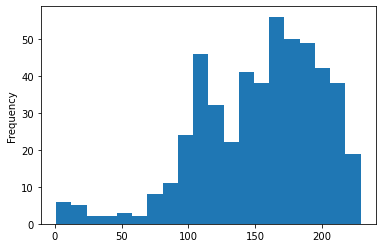

In [38]:
df_reponses.groupby("node_id")["node_id"].count().plot.hist(bins=20)   
# --> Eliminer les questionnaires avec moins de 100 réponses ?

In [39]:
#Nombre de questionnaires restants
df_reponses["node_id"].nunique()

496

#### Elimination des clients n'ayant pas répondu à au moins "rep_min" questions :

In [40]:
rep_min = 100 
v = df_reponses.node_id.value_counts()
df_reponses = df_reponses[df_reponses.node_id.isin(v.index[v.gt(rep_min)])]
df_reponses

,node_id,valeur_actee,non_concerne_acte,commentaire_acte,question_id
0,2c90f5883f44af68013f564a1326558a,c3ae13b6-8907-389b-5daa-d4c19e4e9816,\0,NaN,006F52E9102A8D3BE2FE5614F42BA989
1,2c90f5883f44af68013f564a1326558a,83dff396-6c91-01ca-46ed-ebcf7c685810,\0,Oui\n2,013D407166EC4FA56EB1E1F8CBE183B9
2,2c90f5883f44af68013f564a1326558a,3816c6a2-2a60-e9f2-1430-954151ba8d1a,\0,NaN,02522A2B2726FB0A03BB19F2D8D9524D
3,2c90f5883f44af68013f564a1326558a,fa4a1c04-c8b1-b7a5-fe48-4351eb44bcca,\0,nous recevons des matières dangereuses (gazole...,02E74F10E0327AD868D138F2B4FDD6F0
4,2c90f5883f44af68013f564a1326558a,24bcb84b-9dba-22aa-3603-921120da5a89,\0,NaN,045117B0E0A11A242B9765E79CBF113F
...,...,...,...,...,...
76076,ff80818173787da801739e854673578c,92aa7970-a10a-6221-7076-78c959eef7bb,\0,3\n,F718499C1C8CEF6730F9FD03C8125CAB
76077,ff80818173787da801739e854673578c,e1da2722-bd6e-b468-459f-304a2aa03604,\0,NaN,F7664060CC52BC6F3D620BCEDC94A4B6
76078,ff80818173787da801739e854673578c,1042dbae-dba6-c268-32e2-25e7f716e919,\0,NaN,F7E6C85504CE6E82442C770F7C8606F0
76079,ff80818173787da801739e854673578c,fe5d8c00-c7e6-e2fa-3157-cf9929e60238,\0,NaN,FBD7939D674997CDB4692D34DE8633C4


<AxesSubplot:ylabel='Frequency'>

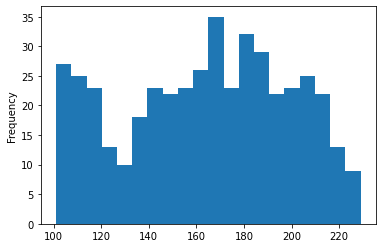

In [41]:
# Vérification
df_reponses.groupby("node_id")["node_id"].count().plot.hist(bins=20)   

In [42]:
#Nombres de questionnaires restants
df_reponses["node_id"].nunique()

443

## Transformation des valeur actées en entiers python

In [43]:
df_choix = pd.read_csv("../raw_data/deep_course_formulaire_question_choix.csv", low_memory = False)
df_choix

,choix_order,choix_id,question_id
0,0,4C6AE4E18514140E78D6116F51E7DDEB,006F52E9102A8D3BE2FE5614F42BA989
1,1,C3AE13B68907389B5DAAD4C19E4E9816,006F52E9102A8D3BE2FE5614F42BA989
2,0,83DFF3966C9101CA46EDEBCF7C685810,013D407166EC4FA56EB1E1F8CBE183B9
3,1,A7ACD0346943D0C4BF2AB3B45C074E7C,013D407166EC4FA56EB1E1F8CBE183B9
4,0,C6212798B661ABC546CD2B6F5B6F596D,02522A2B2726FB0A03BB19F2D8D9524D
...,...,...,...
565,1,CB1597C6D9D4B5CFF7898A6D46C892D2,FA7CDFAD1A5AAF8370EBEDA47A1FF1C3
566,0,A2E19C8756B94B17676101F1A80EC189,FBD7939D674997CDB4692D34DE8633C4
567,1,FE5D8C00C7E6E2FA3157CF9929E60238,FBD7939D674997CDB4692D34DE8633C4
568,0,7BDF486C2DD1A1F1D65C3EBE95C07956,FC221309746013AC554571FBD180E1C8


In [44]:
df_choix.groupby("choix_order")["choix_order"].count().sort_values(ascending= False)

choix_order
1    264
0    264
2     16
3     12
4      9
5      5
Name: choix_order, dtype: int64

In [45]:
pd.options.mode.chained_assignment = None 
df_reponses["valeur_actee"] = df_reponses["valeur_actee"].apply(lambda x : x.replace("-",""))  #on élimine les tirets
df_reponses["valeur_actee"] = df_reponses["valeur_actee"].str.upper() #On met en majuscules pour coincïder avec df_choix
df_reponses

,node_id,valeur_actee,non_concerne_acte,commentaire_acte,question_id
0,2c90f5883f44af68013f564a1326558a,C3AE13B68907389B5DAAD4C19E4E9816,\0,NaN,006F52E9102A8D3BE2FE5614F42BA989
1,2c90f5883f44af68013f564a1326558a,83DFF3966C9101CA46EDEBCF7C685810,\0,Oui\n2,013D407166EC4FA56EB1E1F8CBE183B9
2,2c90f5883f44af68013f564a1326558a,3816C6A22A60E9F21430954151BA8D1A,\0,NaN,02522A2B2726FB0A03BB19F2D8D9524D
3,2c90f5883f44af68013f564a1326558a,FA4A1C04C8B1B7A5FE484351EB44BCCA,\0,nous recevons des matières dangereuses (gazole...,02E74F10E0327AD868D138F2B4FDD6F0
4,2c90f5883f44af68013f564a1326558a,24BCB84B9DBA22AA3603921120DA5A89,\0,NaN,045117B0E0A11A242B9765E79CBF113F
...,...,...,...,...,...
76076,ff80818173787da801739e854673578c,92AA7970A10A6221707678C959EEF7BB,\0,3\n,F718499C1C8CEF6730F9FD03C8125CAB
76077,ff80818173787da801739e854673578c,E1DA2722BD6EB468459F304A2AA03604,\0,NaN,F7664060CC52BC6F3D620BCEDC94A4B6
76078,ff80818173787da801739e854673578c,1042DBAEDBA6C26832E225E7F716E919,\0,NaN,F7E6C85504CE6E82442C770F7C8606F0
76079,ff80818173787da801739e854673578c,FE5D8C00C7E6E2FA3157CF9929E60238,\0,NaN,FBD7939D674997CDB4692D34DE8633C4


In [46]:
df_reponses = pd.merge(df_reponses, df_choix, how='left', left_on=['valeur_actee'], right_on=['choix_id'])
df_reponses

,node_id,valeur_actee,non_concerne_acte,commentaire_acte,question_id_x,choix_order,choix_id,question_id_y
0,2c90f5883f44af68013f564a1326558a,C3AE13B68907389B5DAAD4C19E4E9816,\0,NaN,006F52E9102A8D3BE2FE5614F42BA989,1.0,C3AE13B68907389B5DAAD4C19E4E9816,006F52E9102A8D3BE2FE5614F42BA989
1,2c90f5883f44af68013f564a1326558a,83DFF3966C9101CA46EDEBCF7C685810,\0,Oui\n2,013D407166EC4FA56EB1E1F8CBE183B9,0.0,83DFF3966C9101CA46EDEBCF7C685810,013D407166EC4FA56EB1E1F8CBE183B9
2,2c90f5883f44af68013f564a1326558a,3816C6A22A60E9F21430954151BA8D1A,\0,NaN,02522A2B2726FB0A03BB19F2D8D9524D,1.0,3816C6A22A60E9F21430954151BA8D1A,02522A2B2726FB0A03BB19F2D8D9524D
3,2c90f5883f44af68013f564a1326558a,FA4A1C04C8B1B7A5FE484351EB44BCCA,\0,nous recevons des matières dangereuses (gazole...,02E74F10E0327AD868D138F2B4FDD6F0,0.0,FA4A1C04C8B1B7A5FE484351EB44BCCA,02E74F10E0327AD868D138F2B4FDD6F0
4,2c90f5883f44af68013f564a1326558a,24BCB84B9DBA22AA3603921120DA5A89,\0,NaN,045117B0E0A11A242B9765E79CBF113F,0.0,24BCB84B9DBA22AA3603921120DA5A89,045117B0E0A11A242B9765E79CBF113F
...,...,...,...,...,...,...,...,...
72623,ff80818173787da801739e854673578c,92AA7970A10A6221707678C959EEF7BB,\0,3\n,F718499C1C8CEF6730F9FD03C8125CAB,0.0,92AA7970A10A6221707678C959EEF7BB,F718499C1C8CEF6730F9FD03C8125CAB
72624,ff80818173787da801739e854673578c,E1DA2722BD6EB468459F304A2AA03604,\0,NaN,F7664060CC52BC6F3D620BCEDC94A4B6,1.0,E1DA2722BD6EB468459F304A2AA03604,F7664060CC52BC6F3D620BCEDC94A4B6
72625,ff80818173787da801739e854673578c,1042DBAEDBA6C26832E225E7F716E919,\0,NaN,F7E6C85504CE6E82442C770F7C8606F0,0.0,1042DBAEDBA6C26832E225E7F716E919,F7E6C85504CE6E82442C770F7C8606F0
72626,ff80818173787da801739e854673578c,FE5D8C00C7E6E2FA3157CF9929E60238,\0,NaN,FBD7939D674997CDB4692D34DE8633C4,1.0,FE5D8C00C7E6E2FA3157CF9929E60238,FBD7939D674997CDB4692D34DE8633C4


In [47]:
#Colonne inutile
df_reponses.groupby("non_concerne_acte")["non_concerne_acte"].count().sort_values(ascending= False)

non_concerne_acte
\0    72605
        23
Name: non_concerne_acte, dtype: int64

In [48]:
#Elimination des colonnes inutiles
df_reponses = df_reponses.drop(labels = ["non_concerne_acte", "choix_id", "question_id_y", "valeur_actee", "commentaire_acte"], axis = 1)
df_reponses

,node_id,question_id_x,choix_order
0,2c90f5883f44af68013f564a1326558a,006F52E9102A8D3BE2FE5614F42BA989,1.0
1,2c90f5883f44af68013f564a1326558a,013D407166EC4FA56EB1E1F8CBE183B9,0.0
2,2c90f5883f44af68013f564a1326558a,02522A2B2726FB0A03BB19F2D8D9524D,1.0
3,2c90f5883f44af68013f564a1326558a,02E74F10E0327AD868D138F2B4FDD6F0,0.0
4,2c90f5883f44af68013f564a1326558a,045117B0E0A11A242B9765E79CBF113F,0.0
...,...,...,...
72623,ff80818173787da801739e854673578c,F718499C1C8CEF6730F9FD03C8125CAB,0.0
72624,ff80818173787da801739e854673578c,F7664060CC52BC6F3D620BCEDC94A4B6,1.0
72625,ff80818173787da801739e854673578c,F7E6C85504CE6E82442C770F7C8606F0,0.0
72626,ff80818173787da801739e854673578c,FBD7939D674997CDB4692D34DE8633C4,1.0


In [49]:
df_reponses = df_reponses.dropna(subset = ["choix_order"]).reset_index(drop=True)
df_reponses["choix_order"] = df_reponses["choix_order"].astype(int)
df_reponses.rename(columns={'question_id_x': 'question_id'}, inplace=True)
df_reponses

,node_id,question_id,choix_order
0,2c90f5883f44af68013f564a1326558a,006F52E9102A8D3BE2FE5614F42BA989,1
1,2c90f5883f44af68013f564a1326558a,013D407166EC4FA56EB1E1F8CBE183B9,0
2,2c90f5883f44af68013f564a1326558a,02522A2B2726FB0A03BB19F2D8D9524D,1
3,2c90f5883f44af68013f564a1326558a,02E74F10E0327AD868D138F2B4FDD6F0,0
4,2c90f5883f44af68013f564a1326558a,045117B0E0A11A242B9765E79CBF113F,0
...,...,...,...
71574,ff80818173787da801739e854673578c,F718499C1C8CEF6730F9FD03C8125CAB,0
71575,ff80818173787da801739e854673578c,F7664060CC52BC6F3D620BCEDC94A4B6,1
71576,ff80818173787da801739e854673578c,F7E6C85504CE6E82442C770F7C8606F0,0
71577,ff80818173787da801739e854673578c,FBD7939D674997CDB4692D34DE8633C4,1


In [50]:
df_reponses.groupby("choix_order")["choix_order"].count().sort_values(ascending= False)

choix_order
1    40373
0    31036
2      110
3       36
4       14
5       10
Name: choix_order, dtype: int64

In [51]:
#OK, la somme fait bien 71579

In [52]:
#On met l'id client en index
df_reponses.set_index("node_id", inplace=True)
df_reponses

,question_id,choix_order
node_id,,
2c90f5883f44af68013f564a1326558a,006F52E9102A8D3BE2FE5614F42BA989,1
2c90f5883f44af68013f564a1326558a,013D407166EC4FA56EB1E1F8CBE183B9,0
2c90f5883f44af68013f564a1326558a,02522A2B2726FB0A03BB19F2D8D9524D,1
2c90f5883f44af68013f564a1326558a,02E74F10E0327AD868D138F2B4FDD6F0,0
2c90f5883f44af68013f564a1326558a,045117B0E0A11A242B9765E79CBF113F,0
...,...,...
ff80818173787da801739e854673578c,F718499C1C8CEF6730F9FD03C8125CAB,0
ff80818173787da801739e854673578c,F7664060CC52BC6F3D620BCEDC94A4B6,1
ff80818173787da801739e854673578c,F7E6C85504CE6E82442C770F7C8606F0,0


In [53]:
df_reponses = df_reponses.pivot(columns = 'question_id')
df_reponses #OK, normal que des NaN apparaissent

choix_order  \
question_id                      006F52E9102A8D3BE2FE5614F42BA989   
node_id                                                             
2c90f5883f44af68013f564a1326558a                              1.0   
2c90f5883fcf3281013fe7c2f0eb4dbe                              1.0   
2c90f588404b48480140ce4d7d301013                              0.0   
2c90f5884109d2c401410c40ae942d95                              1.0   
2c90f5884109d2c401410c4434a433a6                              1.0   
...                                                           ...   
ff808181717a658e017181c0a2022261                              1.0   
ff808181717a658e017181c124ca22c6                              1.0   
ff808181725806fc017299554104555f                              NaN   
ff80818172c43c3a0172c7a3d28c62e5                              1.0   
ff80818173787da801739e854673578c                              NaN   

                                                                   \
question_id                      013D407166EC4FA56EB1E1F8CBE183B9   
node_id                                                             
2c90f5883f44af68013f564a1326558a                              0.0   
2c90f5883fcf3281013fe7c2f0eb4dbe                              1.0   
2c90f588404b48480140ce4d7d301013                              0.0   
2c90f5884109d2c401410c40ae942d95                              1.0   
2c90f5884109d2c401410c4434a433a6                              0.0   
...                                                           ...   
ff808181717a658e017181c0a2022261                              0.0   
ff808181717a658e017181c124ca22c6                              0.0   
ff808181725806fc017299554104555f                              0.0   
ff80818172c43c3a0172c7a3d28c62e5                              0.0   
ff80818173787da801739e854673578c                              0.0   

                                                                   \
question_id                      02522A2B2726FB0A03BB19F2D8D9524D   
node_id                                                             
2c90f5883f44af68013f564a1326558a                              1.0   
2c90f5883fcf3281013fe7c2f0eb4dbe                              0.0   
2c90f588404b48480140ce4d7d301013                              0.0   
2c90f5884109d2c401410c40ae942d95                              1.0   
2c90f5884109d2c401410c4434a433a6                              0.0   
...                                                           ...   
ff808181717a658e017181c0a2022261                              0.0   
ff808181717a658e017181c124ca22c6                              0.0   
ff808181725806fc017299554104555f                              1.0   
ff80818172c43c3a0172c7a3d28c62e5                              1.0   
ff80818173787da801739e854673578c                              NaN   

                                                                   \
question_id                      02E74F10E0327AD868D138F2B4FDD6F0   
node_id                                                             
2c90f5883f44af68013f564a1326558a                              0.0   
2c90f5883fcf3281013fe7c2f0eb4dbe                              0.0   
2c90f588404b48480140ce4d7d301013                              0.0   
2c90f5884109d2c401410c40ae942d95                              0.0   
2c90f5884109d2c401410c4434a433a6                              0.0   
...                                                           ...   
ff808181717a658e017181c0a2022261                              0.0   
ff808181717a658e017181c124ca22c6                              0.0   
ff808181725806fc017299554104555f                              0.0   
ff80818172c43c3a0172c7a3d28c62e5                              0.0   
ff80818173787da801739e854673578c                              0.0   

                                                                   \
question_id                      042F2AFDAD0611E7B3CE001851D17886   
node_id                                         

In [54]:
df_reponses.columns = df_reponses.columns.droplevel()
df_reponses

question_id,006F52E9102A8D3BE2FE5614F42BA989,013D407166EC4FA56EB1E1F8CBE183B9,02522A2B2726FB0A03BB19F2D8D9524D,02E74F10E0327AD868D138F2B4FDD6F0,042F2AFDAD0611E7B3CE001851D17886,045117B0E0A11A242B9765E79CBF113F,060AD92489947D410D897474079C1477,06138BC5AF6023646EDE0E1F7C1EAC75,0777D5C17D4066B82AB86DFF8A46AF6F,07CDFD23373B17C6B337251C22B7EA57,...,F340F1B1F65B6DF5B5E3F94D95B11DAF,F457C545A9DED88F18ECEE47145A72C0,F4B9EC30AD9F68F89B29639786CB62EF,F7177163C833DFF4B38FC8D2872F1EC6,F718499C1C8CEF6730F9FD03C8125CAB,F7664060CC52BC6F3D620BCEDC94A4B6,F7E6C85504CE6E82442C770F7C8606F0,FA7CDFAD1A5AAF8370EBEDA47A1FF1C3,FBD7939D674997CDB4692D34DE8633C4,FC221309746013AC554571FBD180E1C8
node_id,,,,,,,,,,,,,,,,,,,,,
2c90f5883f44af68013f564a1326558a,1.0,0.0,1.0,0.0,NaN,0.0,1.0,NaN,1.0,NaN,...,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,1.0,NaN
2c90f5883fcf3281013fe7c2f0eb4dbe,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,1.0,0.0
2c90f588404b48480140ce4d7d301013,0.0,0.0,0.0,0.0,NaN,NaN,1.0,NaN,1.0,NaN,...,1.0,NaN,1.0,1.0,NaN,NaN,0.0,NaN,1.0,1.0
2c90f5884109d2c401410c40ae942d95,1.0,1.0,1.0,0.0,NaN,0.0,1.0,NaN,1.0,NaN,...,1.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,1.0,0.0
2c90f5884109d2c401410c4434a433a6,1.0,0.0,0.0,0.0,NaN,0.0,1.0,NaN,0.0,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff808181717a658e017181c0a2022261,1.0,0.0,0.0,0.0,NaN,1.0,1.0,NaN,1.0,NaN,...,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,1.0
ff808181717a658e017181c124ca22c6,1.0,0.0,0.0,0.0,NaN,0.0,1.0,NaN,0.0,NaN,...,1.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,1.0,1.0
ff808181725806fc017299554104555f,NaN,0.0,1.0,0.0,1.0,NaN,NaN,0.0,NaN,0.0,...,NaN,0.0,0.0,1.0,0.0,NaN,NaN,NaN,1.0,NaN


In [55]:
df_reponses = pd.get_dummies(df_reponses.apply(pd.to_numeric), columns = df_reponses.columns.to_list(), dummy_na=True)

In [56]:
#Base finale :
df_reponses

,006F52E9102A8D3BE2FE5614F42BA989_0.0,006F52E9102A8D3BE2FE5614F42BA989_1.0,006F52E9102A8D3BE2FE5614F42BA989_nan,013D407166EC4FA56EB1E1F8CBE183B9_0.0,013D407166EC4FA56EB1E1F8CBE183B9_1.0,013D407166EC4FA56EB1E1F8CBE183B9_nan,02522A2B2726FB0A03BB19F2D8D9524D_0.0,02522A2B2726FB0A03BB19F2D8D9524D_1.0,02522A2B2726FB0A03BB19F2D8D9524D_nan,02E74F10E0327AD868D138F2B4FDD6F0_0.0,...,F7E6C85504CE6E82442C770F7C8606F0_nan,FA7CDFAD1A5AAF8370EBEDA47A1FF1C3_0.0,FA7CDFAD1A5AAF8370EBEDA47A1FF1C3_1.0,FA7CDFAD1A5AAF8370EBEDA47A1FF1C3_nan,FBD7939D674997CDB4692D34DE8633C4_0.0,FBD7939D674997CDB4692D34DE8633C4_1.0,FBD7939D674997CDB4692D34DE8633C4_nan,FC221309746013AC554571FBD180E1C8_0.0,FC221309746013AC554571FBD180E1C8_1.0,FC221309746013AC554571FBD180E1C8_nan
node_id,,,,,,,,,,,,,,,,,,,,,
2c90f5883f44af68013f564a1326558a,0,1,0,1,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
2c90f5883fcf3281013fe7c2f0eb4dbe,0,1,0,0,1,0,1,0,0,1,...,0,0,0,1,0,1,0,1,0,0
2c90f588404b48480140ce4d7d301013,1,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
2c90f5884109d2c401410c40ae942d95,0,1,0,0,1,0,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
2c90f5884109d2c401410c4434a433a6,0,1,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff808181717a658e017181c0a2022261,0,1,0,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
ff808181717a658e017181c124ca22c6,0,1,0,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
ff808181725806fc017299554104555f,0,0,1,1,0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1


In [57]:
# Juste pour vérifier qu'on a bien intégré les colonnes avec les choix 2, 3, etc..

print([col for col in df_reponses.columns if '_2' in col], '\n','\n',
      [col for col in df_reponses.columns if '_3' in col], '\n','\n',
      [col for col in df_reponses.columns if '_4' in col], '\n','\n',
      [col for col in df_reponses.columns if '_5' in col])

['0E65972DCE68DAD4D52D063967F0A705_2.0', '0F49C89D1E7298BB9930789C8ED59D48_2.0', '182BE0C5CDCD5072BB1864CDEE4D3D6E_2.0', '47D1E990583C9C67424D369F3414728E_2.0', '48AEDB8880CAB8C45637ABC7493ECDDD_2.0', '7A614FD06C325499F1680B9896BEEDEB_2.0', '854D6FAE5EE42911677C739EE1734486_2.0', 'A3F390D88E4C41F2747BFA2F1B5F87DB_2.0', 'A4A042CF4FD6BFB47701CBC8A1653ADA_2.0'] 
 
 ['47D1E990583C9C67424D369F3414728E_3.0', '48AEDB8880CAB8C45637ABC7493ECDDD_3.0', '7A614FD06C325499F1680B9896BEEDEB_3.0', '854D6FAE5EE42911677C739EE1734486_3.0', 'C74D97B01EAE257E44AA9D5BADE97BAF_3.0', 'D947BF06A885DB0D477D707121934FF8_3.0'] 
 
 ['7A614FD06C325499F1680B9896BEEDEB_4.0', 'A3F390D88E4C41F2747BFA2F1B5F87DB_4.0', 'C74D97B01EAE257E44AA9D5BADE97BAF_4.0', 'D947BF06A885DB0D477D707121934FF8_4.0'] 
 
 ['182BE0C5CDCD5072BB1864CDEE4D3D6E_5.0', '33E75FF09DD601BBE69F351039152189_5.0', 'D947BF06A885DB0D477D707121934FF8_5.0']


In [58]:
#Ok on a bien les 256 colonnes en cas de non réponse :
len([col for col in df_reponses.columns if 'nan' in col])

256

In [60]:
#Sauvegarde de la base des réponses nettoyée
df_reponses.to_pickle("../data/df_reponses.csv")